# Catalog Utils

Use catalogutils to interact with the MAYA catalog of numerical relativity waveforms (https://cgp.ph.utexas.edu/waveform). Use this to obtain the parameters (such as mass ratio, spins, etc) for simulations, search for simulations with given parameters, plot parameters, or download waveforms. 

In [1]:
from mayawaves.utils.catalogutils import Catalog
from mayawaves.utils.catalogutils import Parameter as p

## Create an instance of the Catalog class

This updates the metadata for the catalog and creates a Catalog object for you to interact with.

In [2]:
catalog = Catalog()

## Catalog has a property to list all simulations in the maya catalog

In [3]:
all_simulations = catalog.simulations 
print(f"Total number of waveforms in the metadata file is {len(all_simulations)}. First waveform is {all_simulations[0]}")
print(f"The first ten waveforms are {all_simulations[:10]}")

Total number of waveforms in the metadata file is 635. First waveform is GT0001
The first ten waveforms are ['GT0001', 'GT0002', 'GT0003', 'GT0004', 'GT0005', 'GT0006', 'GT0007', 'GT0008', 'GT0009', 'GT0010']


## The Parameter enum allows you to easily reference specific parameters

In [4]:
print(*[(param) for param in p], sep = "\n")

Parameter.NAME
Parameter.MASS_1
Parameter.MASS_2
Parameter.IRREDUCIBLE_MASS_1
Parameter.IRREDUCIBLE_MASS_2
Parameter.MASS_RATIO
Parameter.SYMMETRIC_MASS_RATIO
Parameter.DIMENSIONLESS_SPIN_1
Parameter.DIMENSIONLESS_SPIN_X_1
Parameter.DIMENSIONLESS_SPIN_Y_1
Parameter.DIMENSIONLESS_SPIN_Z_1
Parameter.DIMENSIONLESS_SPIN_2
Parameter.DIMENSIONLESS_SPIN_X_2
Parameter.DIMENSIONLESS_SPIN_Y_2
Parameter.DIMENSIONLESS_SPIN_Z_2
Parameter.CHI_EFF
Parameter.CHI_P
Parameter.F_LOWER_AT_1MSUN
Parameter.SEPARATION
Parameter.ECCENTRICITY
Parameter.MEAN_ANOMALY
Parameter.MERGE_TIME
Parameter.MAYA_SIZE_GB
Parameter.LVCNR_SIZE_GB


## Catalog has properties to grab all nonspinning, aligned spin, or precessing simulations

In [5]:
nonspinning_simulations = catalog.nonspinning_simulations
print(f"Total number of waveforms with no spin: {len(nonspinning_simulations)}. First waveform is {nonspinning_simulations[0]}")

Total number of waveforms with no spin: 103. First waveform is GT0370


In [6]:
aligned_spin_simulations = catalog.aligned_spin_simulations
print(f"Total number of waveforms with aligned spins: {len(aligned_spin_simulations)}. First waveform is {aligned_spin_simulations[0]}")

Total number of waveforms with aligned spins: 157. First waveform is GT0355


In [7]:
precessing_simulations = catalog.precessing_simulations
print(f"Total number of precessing waveforms: {len(precessing_simulations)}. First waveform is {precessing_simulations[0]}")

Total number of precessing waveforms: 370. First waveform is GT0001


## Get simulations with a given mass ratio 

In [8]:
mass_ratio = 2
sims = catalog.get_simulations_with_mass_ratio(mass_ratio = mass_ratio)  
print(f"Total number of waveforms with q = {mass_ratio} is {len(sims)}. First waveform is {sims[0]}")

Total number of waveforms with q = 2 is 53. First waveform is GT0428


### You can also enter a tolerance for a parameter, and will receive simulations that are within that tolerance of the requested mass ratio

In [9]:
mass_ratio = 2
tol = 0.1
sims = catalog.get_simulations_with_mass_ratio(mass_ratio=mass_ratio, tol=tol)  
print(f"Total number of waveforms with q = {mass_ratio} and tolerance {tol} is {len(sims)}. First waveform is {sims[0]}")

Total number of waveforms with q = 2 and tolerance 0.1 is 92. First waveform is GT0376


## Get simulations with a given symmetric mass ratio

In [10]:
eta = 0.23
tol = 0.005
sims = catalog.get_simulations_with_symmetric_mass_ratio(eta=eta, tol=tol)
print(f"Total number of waveforms with eta = {eta} and tol = {tol} is {len(sims)}. First waveform is {sims[0]}")

Total number of waveforms with eta = 0.23 and tol = 0.005 is 9. First waveform is GT0376


## Get the all the parameters of a given simulation

In [11]:
simulation_parameters = catalog.get_parameters_for_simulation("GT0378")
print(f'The mass ratio of GT0378 is {simulation_parameters[p.MASS_RATIO]}')

The mass ratio of GT0378 is 2.050005889145129


In [12]:
simulation_parameter_string = '\n'.join([f'{par.value}: {value}' for par, value in simulation_parameters.items()])
print(f"All available parameters of GT0378 are:\n\n{simulation_parameter_string}")

All available parameters of GT0378 are:

name: D10_a0.0_q2.05_m103_Qs
m1: 0.672130590009755
m2: 0.3278676386095844
m1_irr: 0.67213059
m2_irr: 0.3278676386
q: 2.050005889145129
eta: 0.220371
a1: 1.0775370384725463e-05
a1x: -6.189079683097315e-13
a1y: -5.31375343569779e-15
a1z: 1.0775370384725444e-05
a2: 1.5292461249223795e-05
a2x: -1.0523082784791894e-11
a2y: -1.0845157044129532e-13
a2z: 1.5292461249220173e-05
chi_eff: 1.2256380923285683e-05
chi_p: 4.652204568862241e-12
f_lower_at_1MSUN: 1807.5340709236116
separation: 9.99995249833483
eccentricity: 0.005865368688535364
mean_anomaly: -1.0
merge_time: 998.6407813
maya file size (GB): 0.3597998470067978
lvcnr file size (GB): 0.00412185862660408


## Get all simulations with given parameters

### This method can be used with any number of parameters. It is better to use non-zero tolerances while searching for waveforms to ensure you get all simulations that fit your desired parameters.

In [13]:
simulations = catalog.get_simulations_with_parameters(params = [p.MASS_RATIO, p.DIMENSIONLESS_SPIN_Z_1], values =  [1, 0.5], tol = [0.01, 0.5] )
print(len(simulations))

simulations = catalog.get_simulations_with_parameters(params = [p.MASS_RATIO, p.DIMENSIONLESS_SPIN_X_1, p.DIMENSIONLESS_SPIN_Y_1, p.DIMENSIONLESS_SPIN_Z_1, p.DIMENSIONLESS_SPIN_X_2, p.DIMENSIONLESS_SPIN_Y_2, p.DIMENSIONLESS_SPIN_Z_2], values =  [1, 0.0, 0.0, 0.6, 0.0, 0.0, 0.6], tol = [0.01, 0.001, 0.001, 0.5, 0.001, 0.001, 0.4999] )
print(len(simulations))

simulations = catalog.get_simulations_with_parameters(params = [p.MASS_RATIO, p.DIMENSIONLESS_SPIN_2], values =  [1, 0.1], tol = [0.01, 0.1] )
print(len(simulations))

125
21
27


## Plotting the distribtution of waveform parameters in the catalog

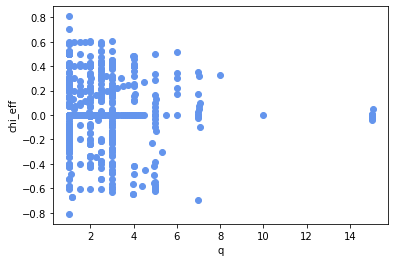

<Figure size 432x288 with 0 Axes>

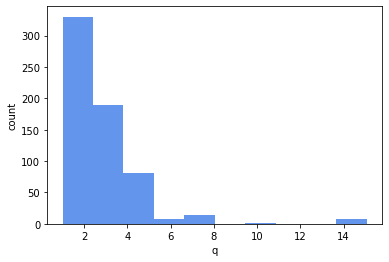

<Figure size 432x288 with 0 Axes>

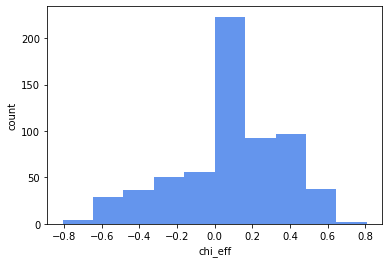

Minimum q: 0.9996440633567225, maximum q: 15.07085918507278
Minimum chi_eff: -0.8089458636660637, maximum chi_eff: 0.8085713846964644


<Figure size 432x288 with 0 Axes>

In [14]:
catalog.plot_catalog_parameters(p.MASS_RATIO, p.CHI_EFF, dpi = 500)

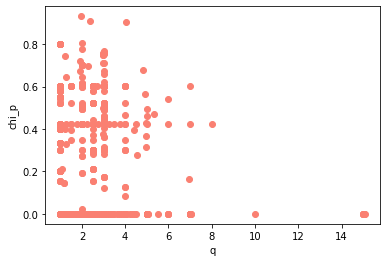

<Figure size 432x288 with 0 Axes>

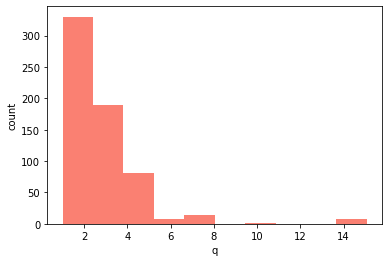

<Figure size 432x288 with 0 Axes>

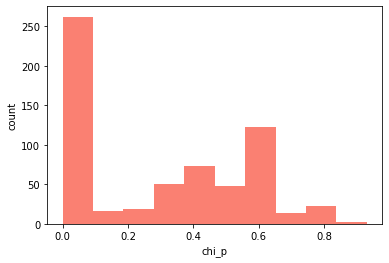

Minimum q: 0.9996440633567225, maximum q: 15.07085918507278
Minimum chi_p: 4.990315336895653e-18, maximum chi_p: 0.9316840649738882


<Figure size 432x288 with 0 Axes>

In [15]:
catalog.plot_catalog_parameters(p.MASS_RATIO, p.CHI_P, dpi = 500, color = "salmon")

### You can also provide a directory to save the figures in and they will be saved rather than displayed.

In [16]:
catalog.plot_catalog_parameters(p.MASS_RATIO, p.DIMENSIONLESS_SPIN_2, dpi = 500 , color = "green", save_path='.')

Minimum q: 0.9996440633567225, maximum q: 15.07085918507278
Minimum a2: 3.8462054439966505e-10, maximum a2: 0.9261967059788215


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Downloading waveforms
To download waveforms from the Center for Gravitational Physics website, use download_waveforms. Here, we will download GT0898 to the current directory.

In [17]:
catalog.download_waveforms(['GT0898'], save_wf_path = '.')

Total size of requested waveforms is 0.92 GB.
----------------------------------------------------------
Catalog id: GT0898
name                  GW15_D12_q1.2_a0.0_m140
m1                    0.5455
m2                    0.4545
m1_irr                0.5455
m2_irr                0.4545
q                     1.2000
eta                   0.2479
a1                    0.0000
a1x                   -0.0000
a1y                   -0.0000
a1z                   0.0000
a2                    0.0000
a2x                   -0.0000
a2y                   -0.0000
a2z                   0.0000
chi_eff               0.0000
chi_p                 0.0000
f_lower_at_1MSUN      1445.3053
separation            12.0000
eccentricity          0.0021
mean_anomaly          3.2766
merge_time            1891.1250
maya file size (GB)   0.9177
lvcnr file size (GB)  0.0084


### Waveforms can also be downloaded in the lvc-nr format (https://arxiv.org/abs/1703.01076)

In [18]:
catalog.download_waveforms(['GT0898'], save_wf_path='.', lvcnr_format=True)

Total size of requested waveforms is 0.01 GB.
----------------------------------------------------------
Catalog id: GT0898
name                  GW15_D12_q1.2_a0.0_m140
m1                    0.5455
m2                    0.4545
m1_irr                0.5455
m2_irr                0.4545
q                     1.2000
eta                   0.2479
a1                    0.0000
a1x                   -0.0000
a1y                   -0.0000
a1z                   0.0000
a2                    0.0000
a2x                   -0.0000
a2y                   -0.0000
a2z                   0.0000
chi_eff               0.0000
chi_p                 0.0000
f_lower_at_1MSUN      1445.3053
separation            12.0000
eccentricity          0.0021
mean_anomaly          3.2766
merge_time            1891.1250
maya file size (GB)   0.9177
lvcnr file size (GB)  0.0084
